# Create ratings 2

From our first iteration of adding the song ratings, we got a dataset that had an amount of plays for every person for every song.

That first iteration however had too many songs to create a sparce matrix with in the data alloted.

We'll need to try again to get the data to a point where we can use it.

I think there are a couple of options available:
1. Remove all songs that were only played a single time. This could reduce the size of the frame by removing songs that only one person listened to a single time.
2. Remove all 'listens' where a person only listened to a song a single time. The thinking here is that listening to a song a single time isn't indicative of that person's tastes. The downside here is that we lose a LOT of information. We do need to remove a significant amount of information in order to have an MVP so this may be the best method for now.

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive 

In [2]:
drive.mount('/drive')

Mounted at /drive


In [3]:
listens=pd.read_csv('/drive/My Drive/Colab Notebooks/listen_table.csv')

In [4]:
listens.drop(columns=['Unnamed: 0'], inplace=True)
listens.head()

,user_name,song_no
0,Skeebadoo,0
1,Skeebadoo,1
2,Skeebadoo,2
3,Skeebadoo,3
4,Svarthjelm,4


In [5]:
listens['listen_no'] = 1
listens = listens.groupby(["user_name","song_no"], sort=False, as_index=False).agg({"listen_no":"sum"})
# listens.head()
len(listens)

12819261

In [6]:
listens2 = listens[listens['listen_no'] > 1]
# listens2.head()
len(listens2)

5267495

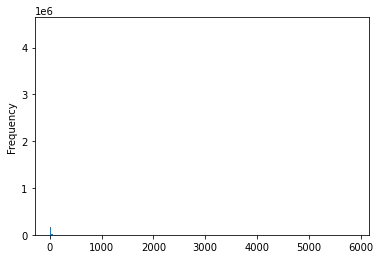

In [7]:
listens2['listen_no'].plot.hist(bins=1000)

In [8]:
# set max listens to 10
mask = listens2['listen_no'] > 10
column_name = 'listen_no'
listens2.loc[mask, column_name] = 10

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Text(0.5, 1.0, 'Frequency of Ratings')

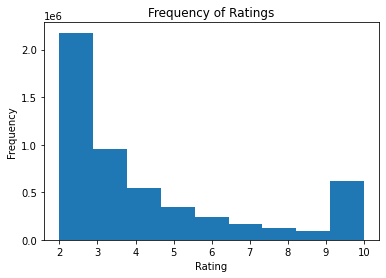

In [9]:
listens2['listen_no'].plot.hist(bins=9)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Frequency of Ratings')

In [ ]:
listens2['listen_no'].value_counts(normalize=True)

2     0.413508
3     0.180715
10    0.117120
4     0.103668
5     0.064923
6     0.044986
7     0.032022
8     0.024490
9     0.018567
Name: listen_no, dtype: float64

We've reduced the size of our dataset by a significant amount by eliminating songs that people have only listened to a single time.

We've also taken all listens with more than 10 plays and changed them into having 10 plays. We can see that grouping all profile/song combos with more than 10 plays into the 10 play bucket doesn't change the data by much for moving forward.

Based on this graph, we'll go ahead and assign ratings by the number of plays per profile.
- Rating = 3 if plays = 2 (0.414 of data)
- Rating = 4 if 2 < plays <= 5 (0.350 of data)
- Rating = 5 if plays > 5 (0.236 of data)'

We'll also create another dataset where the rating is the same as the amount of plays.

This is #2 based on the conditions entered earlier and makes for a better mvp than the proposition from #1. We'll save it for now to work on in gridsearch2.

In [ ]:
listens3 = listens2.copy(deep = True)

In [ ]:
# Minimum rating = 3
listens2['rating'] = 3

# Rating = 4 if 2 < plays <= 5 (0.350 of data)
listens2.loc[(listens2['listen_no'] > 2) &
             (listens2['listen_no'] <= 5), 'rating'] = 4

# Rating = 5 if plays > 5 (0.236 of data)
listens2.loc[listens2['listen_no'] > 5, 'rating'] = 5

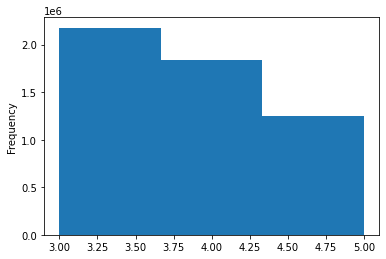

In [ ]:
listens2['rating'].plot.hist(bins=3)

In [ ]:
# We'll save this now to gridsearch in another notebook
listens2.to_csv('/drive/My Drive/Colab Notebooks/rated_listens2.csv')

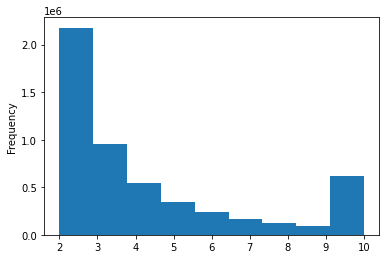

In [ ]:
listens3['rating'] = listens3['listen_no']
listens3['rating'].plot.hist(bins=9);

In [ ]:
listens3.to_csv('/drive/My Drive/Colab Notebooks/rated_listens3.csv')